<a href="https://colab.research.google.com/github/dldisha/G2M-insight/blob/main/EDA_G2M_car_investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#G2M insight for Cab Investment firm 

**Problem Statement:**
There are two cab companies which XYZ wants to invest in, so they require actionable insights to help them identify the right company to make their investment.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [2]:
#reading files
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
custid = pd.read_csv('Customer_ID.csv')
transid = pd.read_csv('Transaction_ID.csv')

In [3]:
print('City data head:')
city.head()

City data head:


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [116]:
print('\nCity data summary:')
print('Shape:', city.shape)
print(city.describe())
print('\nNull Values:')
print(city.isnull().values.any())
print('\nDuplicate Values:')
print(city.duplicated().any())


City data summary:
Shape: (20, 3)
               City   Population      Users
count            20           20         20
unique           20           20         20
top     NEW YORK NY   8,405,837    302,149 
freq              1            1          1

Null Values:
False

Duplicate Values:
False


In [5]:
print('Cab data head:')
cab.head()

Cab data head:


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [117]:
print('\nCab data Summary:')
print('Shape:', cab.shape)
print(cab.describe())
print('\nNull Values:')
print(cab.isnull().values.any())
print('\nDuplicate Values:')
print(cab.duplicated().any())


Cab data Summary:
Shape: (359392, 8)
       Transaction_ID   KM_Travelled  Price_Charged   Cost_of_Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

               Month           Year  
count  359392.000000  359392.000000  
mean        7.509243    2017.041693  
std         3.428929       0.801378  
min         1.000000    2016.000000  
25%         5.000000    2016.000000  
50%         8.000000    2017.000000  
75%        11.000000    2018.000000  
max        12.000000    201

In [7]:
print('Customer ID data head:')
custid.head()

Customer ID data head:


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [118]:
print('\nCustomer id summary:')
print('Shape:', custid.shape)
print(custid.describe())
print('\nNull Values:')
print(custid.isnull().values.any())
print('\nDuplicate Values:')
print(custid.duplicated().any())


Customer id summary:
Shape: (49171, 4)
        Customer_ID           Age  Income_(USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

Null Values:
False

Duplicate Values:
False


In [9]:
print('Transaction id data head:')
transid.head()

Transaction id data head:


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [119]:
print('\nTransaction ID Summary:')
print('Shape:', transid.shape)
print(transid.describe())
print('\nNull Values:')
print(transid.isnull().values.any())
print('\nDuplicate Values:')
print(transid.duplicated().any())


Transaction ID Summary:
Shape: (440098, 3)
       Transaction_ID    Customer_ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

Null Values:
False

Duplicate Values:
False


## Data Cleaning

In [11]:
for cols in cab.columns:
    if ' ' in cols:
        cab = cab.rename(columns={cols:cols.replace(' ','_')})

for cols in custid.columns:
    if ' ' in cols:
        custid = custid.rename(columns={cols:cols.replace(' ','_')})

for cols in transid.columns:
    if ' ' in cols:
        transid = transid.rename(columns={cols:cols.replace(' ','_')})

cab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [12]:
#converting "date of travel" to date format(YYYYMMDD)
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899, 12, 30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

cab['Date_of_Travel'] = cab['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [13]:
cab.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [14]:
months=[]
years =[]

for i in range(len(cab['Date_of_Travel'])):
    months.append(cab['Date_of_Travel'][i].month)
    years.append(cab['Date_of_Travel'][i].year)

cab['Month'] = months
cab['Year'] = years

In [15]:
cab.drop('Date_of_Travel', axis=1, inplace=True)
cab.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [16]:
cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

The two can companies are Pink cab and Yellow cab

In [17]:
#splitting data for pink and yellow cab
PinkCab = cab[cab['Company']=='Pink Cab']
YellowCab = cab[cab['Company']=='Yellow Cab']

In [18]:
print("Pink cab head:")
PinkCab.head()

Pink cab head:


,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [19]:
print("Yellow cab head:")
YellowCab.head()

Yellow cab head:


,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
233,10000384,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,1,2016
234,10000385,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,1,2016
235,10000386,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,1,2016
236,10000387,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,1,2016
237,10000388,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,1,2016


In [20]:
print("Pink cab shape:", PinkCab.shape)
print("Yellow cab shape:", YellowCab.shape)

Pink cab shape: (84711, 8)
Yellow cab shape: (274681, 8)


## Master Data

In [78]:
#outer join, cab, transid and custid
data = cab.merge(transid, on='Transaction_ID').merge(custid, on="Customer_ID")
data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card,Male,28,10813
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card,Male,27,9237
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237


In [79]:
#outer join, data with city
master = data.merge(city, on='City')
master.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701"


In [120]:
print('\nMaster data summary:')
print('\nShape:', master.shape)
print('\n', master.describe())
print('\nNull Values:')
print(master.isnull().values.any())
print('\nDuplicate Values:')
print(master.duplicated().any())


Master data summary:

Shape: (359392, 16)

        Transaction_ID   KM_Travelled  Price_Charged   Cost_of_Trip  \
count    3.593920e+05  359392.000000  359392.000000  359392.000000   
mean     1.022076e+07      22.567254     423.443311     286.190113   
std      1.268058e+05      12.233526     274.378911     157.993661   
min      1.000001e+07       1.900000      15.600000      19.000000   
25%      1.011081e+07      12.000000     206.437500     151.200000   
50%      1.022104e+07      22.440000     386.360000     282.480000   
75%      1.033094e+07      32.960000     583.660000     413.683200   
max      1.044011e+07      48.000000    2048.030000     691.200000   

               Month           Year    Customer_ID            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean        7.509243    2017.041693   19191.652115      35.336705   
std         3.428929       0.801378   21012.412463      12.594234   
min         1.000000    2016.000000       1.0000

## Data Visualisation

#### a) Monthly travel frequency

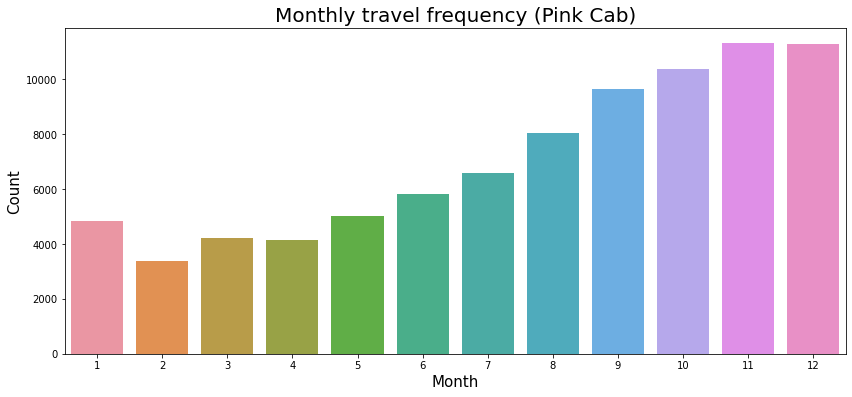

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x ='Month', data = PinkCab)
plt.title('Monthly travel frequency (Pink Cab)',fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

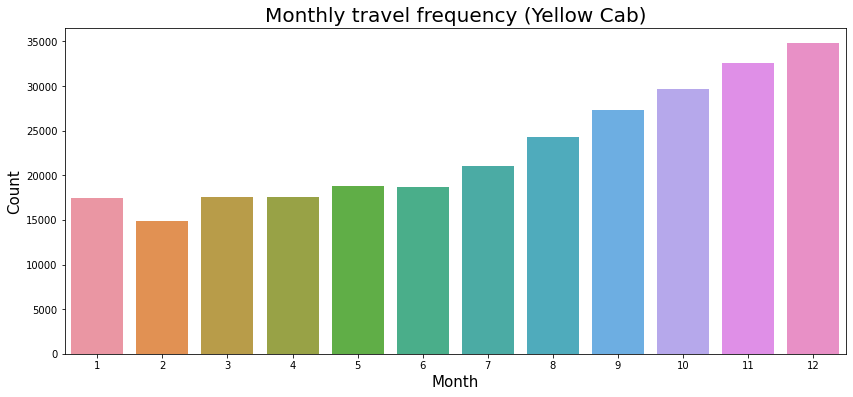

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(x ='Month', data = YellowCab)
plt.title('Monthly travel frequency (Yellow Cab)',fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

Observation: 

* From the above 2 graphs, we can observe that Yellow cab has the highest number of travels. 
* we can also observe that the month of December has the highest number of travels i.e. 35000 for Yellow cab and 11000 for Pink cab. And this could be because of the holiday season. 

#### b) Prive vs Distance travelled

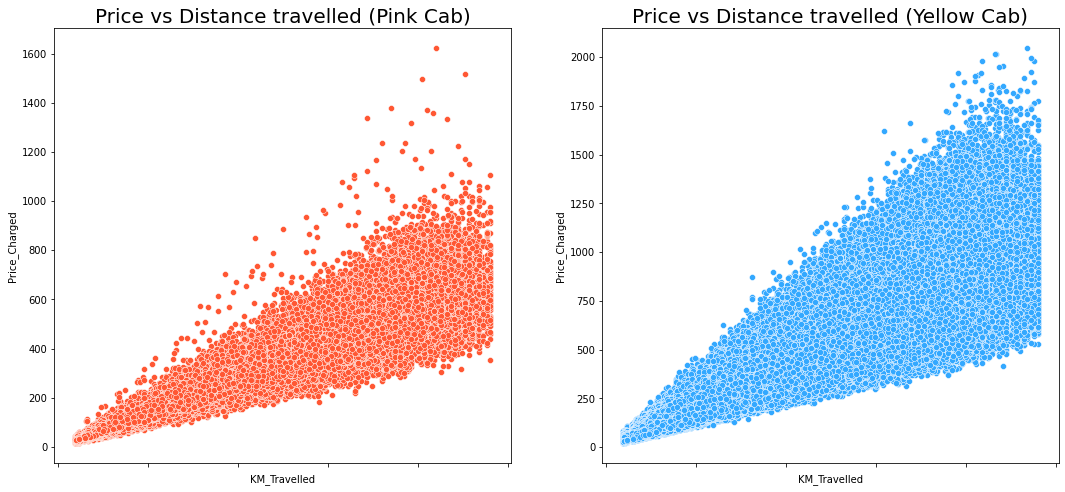

In [114]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1, color='#FF5733')
ax1.set_title('Price vs Distance travelled (Pink Cab)', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize = 15)

sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2, color='#33A8FF')
ax2.set_title('Price vs Distance travelled (Yellow Cab)', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize = 15)

plt.show()

Observation:
* From the above graphs, we can observe that for both the cab companies price increases as the distance increases. That is there is a postive  correlation.
* What interesting thing that I can observe is that Yellow Cab charges more in comparison to Pink Cab.
* The average price for Pink Cab is 900usd while for Yellow cab is 1250usd.
* Some outliners can be seen in both the graphs and this could be because of holidays or seasonal breaks.  







#### c) Yearly profit

In [27]:
pink_trans = PinkCab.groupby('Year').Transaction_ID.count()
pink_price = PinkCab.groupby('Year').Price_Charged.mean()
pink_cost = PinkCab.groupby('Year').Cost_of_Trip.mean()

In [28]:
print("Yearly mean cost of the trip and price charged for pink cab:")
pink_result = pd.concat([pink_price, pink_cost], axis=1, join='inner')

pink_result['Profit_Percent'] = (pink_result['Price_Charged'] / pink_result['Cost_of_Trip']) *100

pink_result

Yearly mean cost of the trip and price charged for pink cab:


,Price_Charged,Cost_of_Trip,Profit_Percent
Year,,,
2016,315.850071,247.039209,127.854227
2017,315.535059,248.820917,126.812112
2018,301.538134,248.413839,121.385401


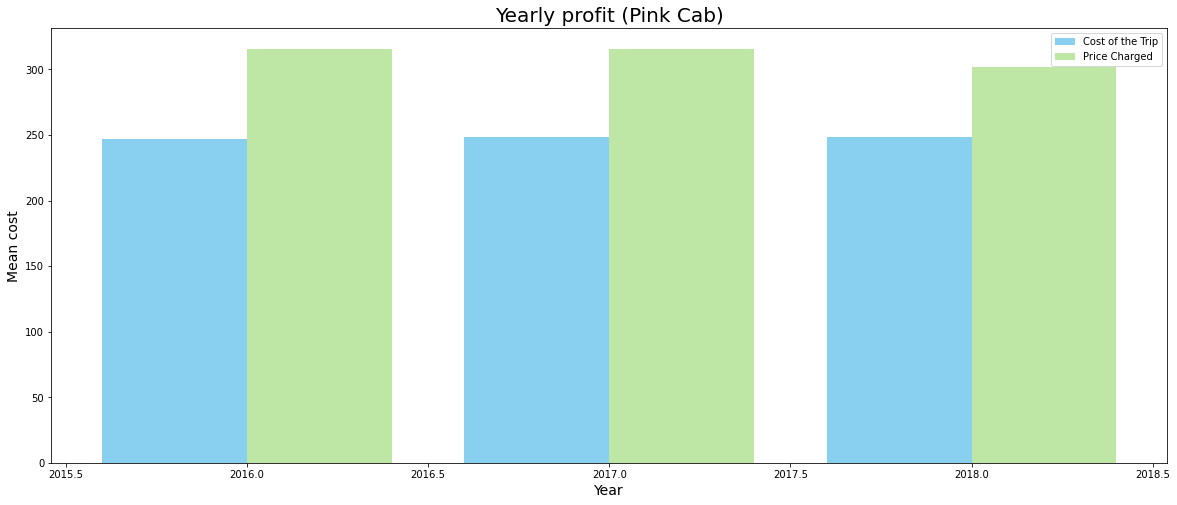

In [66]:
plt.figure(figsize=(20,8))
ax = plt.subplot(111)

ax.bar(pink_trans.index-0.2, pink_cost.values, width=0.4, color='#89cff0', align='center',label='Cost of the Trip')
ax.bar(pink_trans.index+0.2, pink_price.values, width=0.4, color='#bee7a5', align='center',label='Price Charged')
plt.ylabel('Mean cost',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Yearly profit (Pink Cab)', fontsize=20)

plt.legend()
plt.show()

In [30]:
yellow_trans = YellowCab.groupby('Year').Transaction_ID.count()
yellow_price = YellowCab.groupby('Year').Price_Charged.mean()
yellow_cost = YellowCab.groupby('Year').Cost_of_Trip.mean()

In [31]:
print("Yearly mean cost of the trip and price charged for Yellow cab:")
yellow_result = pd.concat([yellow_price, yellow_cost], axis=1, join='inner')

yellow_result['Profit_Percent'] = (yellow_result['Price_Charged'] / yellow_result['Cost_of_Trip']) *100

yellow_result

Yearly mean cost of the trip and price charged for Yellow cab:


,Price_Charged,Cost_of_Trip,Profit_Percent
Year,,,
2016,468.230462,298.536761,156.841811
2017,466.278438,297.861544,156.542007
2018,440.893159,297.442400,148.228080


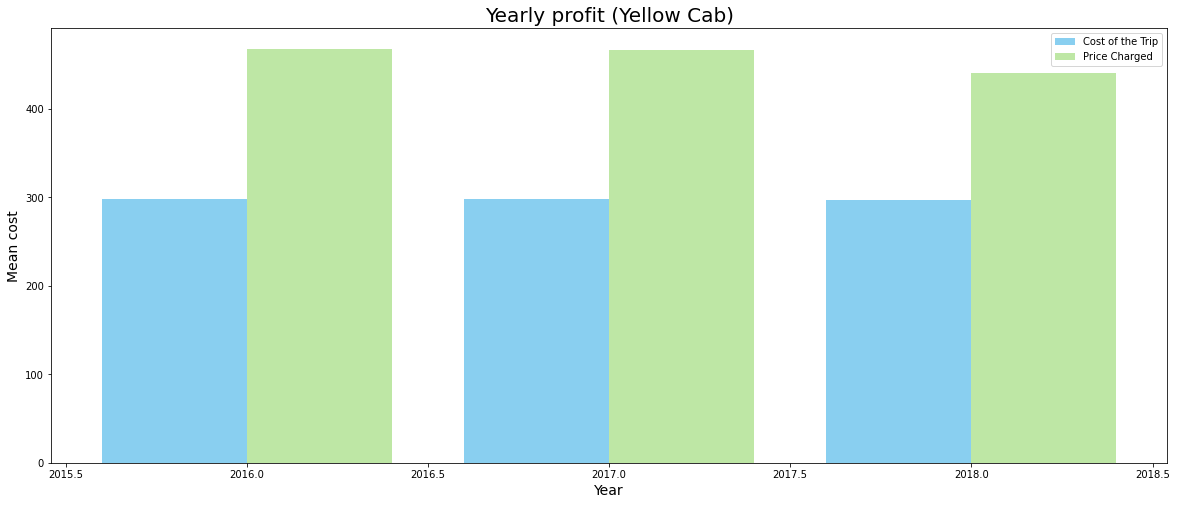

In [67]:
plt.figure(figsize=(20,8))
ax = plt.subplot(111)

ax.bar(yellow_trans.index-0.2, yellow_cost.values, width=0.4, color='#89cff0', align='center',label='Cost of the Trip')
ax.bar(yellow_trans.index+0.2, yellow_price.values, width=0.4, color='#bee7a5', align='center',label='Price Charged')
plt.ylabel('Mean cost',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Yearly profit (Yellow Cab)', fontsize=20)

plt.legend()
plt.show()

Observations:
* From the above two graphs, we can observe that both the companies had profits in each financial year.
* Both the cab comapnies had more profit percentage in the year 2016. 
* From the profit percentage, we can clearly see Yellow cab had more profits in each financial year. 

#### d)  Cities travelled and price charged

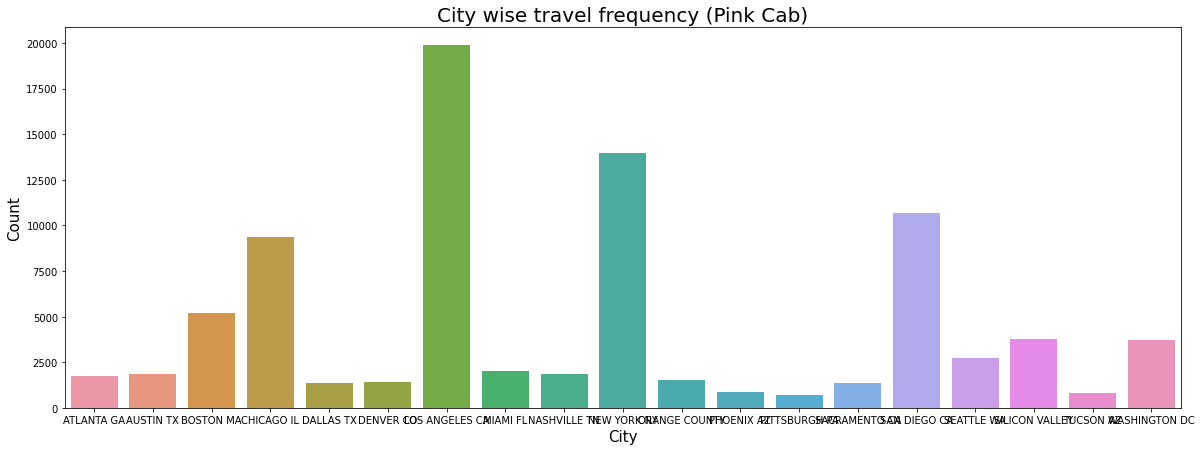

In [39]:
plt.figure(figsize=(20,7))
sns.countplot(x ='City', data = PinkCab)
plt.title('City wise travel frequency (Pink Cab)',fontsize = 20)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

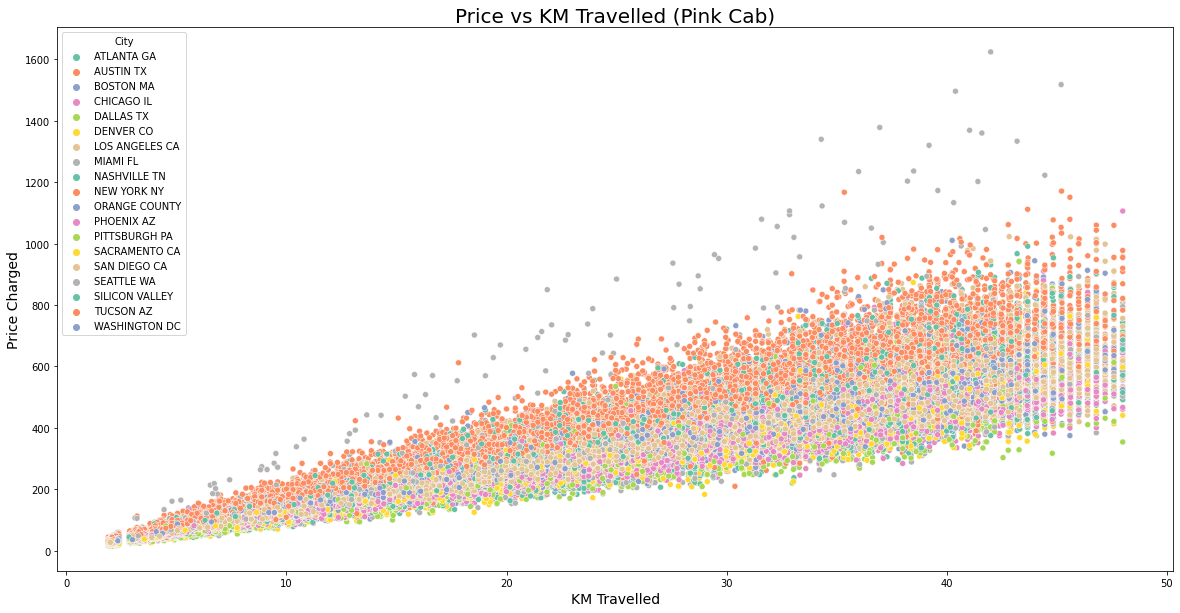

In [45]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=PinkCab, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City", palette = "Set2")

plt.title('Price vs KM Travelled (Pink Cab)',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

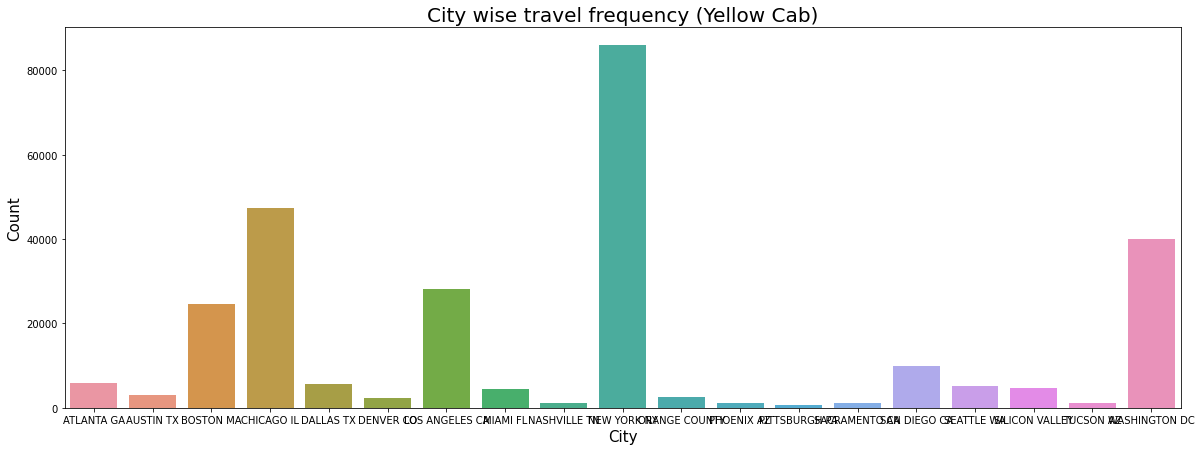

In [40]:
plt.figure(figsize=(20,7))
sns.countplot(x ='City', data = YellowCab)
plt.title('City wise travel frequency (Yellow Cab)',fontsize = 20)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

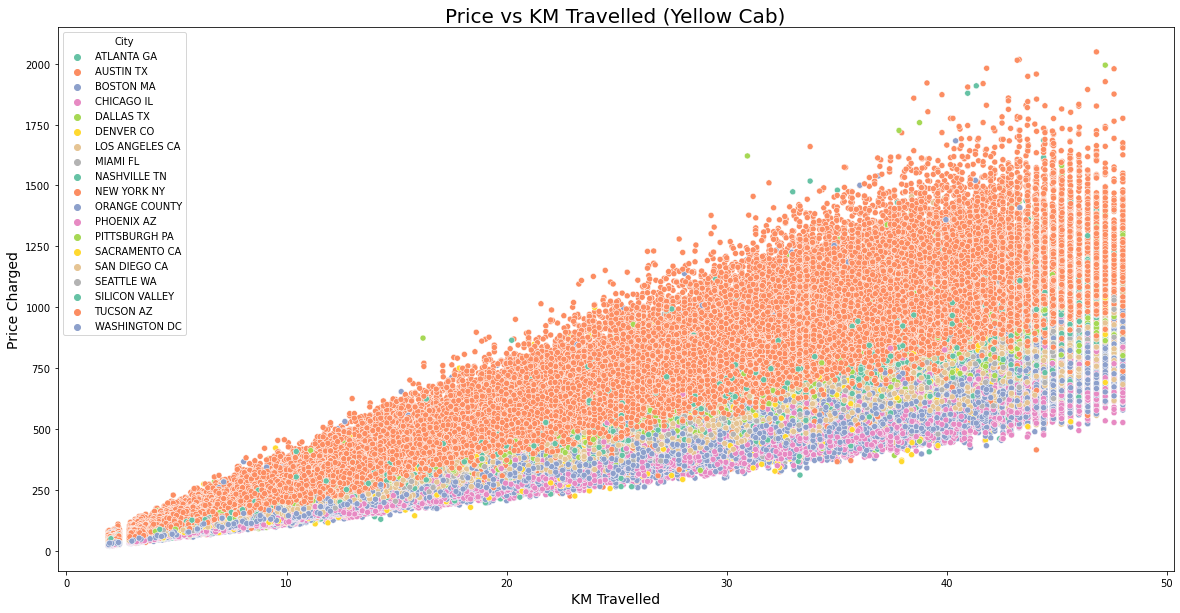

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=YellowCab, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City", palette = "Set2")

plt.title('Price vs KM Travelled (Yellow Cab)',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

Observation:
* From graph 1, we can observe that for Pink cab, Los Angeles has tha maximum count of 18000. 
* From graph 3, we can observe that for Yellow cab, New York City has the maximum count of 90000.
* But we can also observe from graph 3 that Los Angeles has a count > 20000 which means Yellow cab is preferred in major cities like New York and Los Angeles.  
* From graph 2 and 4, we can observe that for New York City the price charged by Yellow cab is higher.

#### e) Percentage of cab users in each city

In [48]:
city_users = master.groupby('City').Users.count()
city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

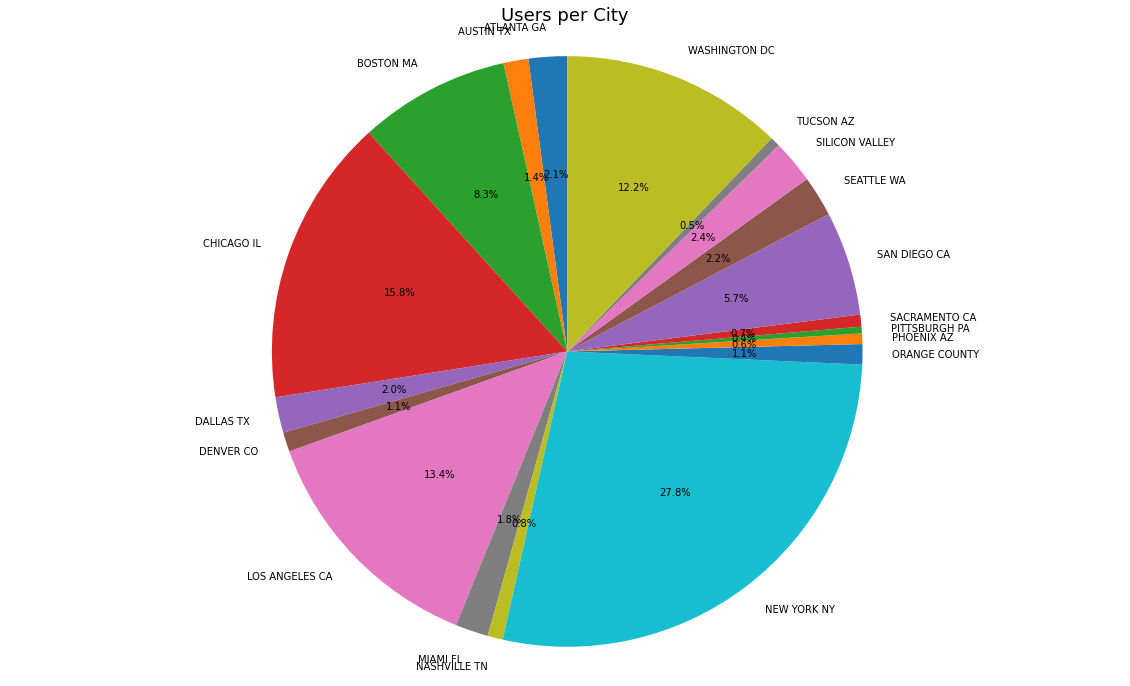

In [75]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(20,12))

axp.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')
plt.title('Users per City', fontsize=18)
plt.show()

Observation:
* New York city has the highest number of cab users i.e 27.8% followed by Chicago and Los Angeles. 

#### f) Gender ratio per cab company

In [58]:
cab_gender = master.groupby(['Company','Gender']).Customer_ID.nunique()
cab_gender

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

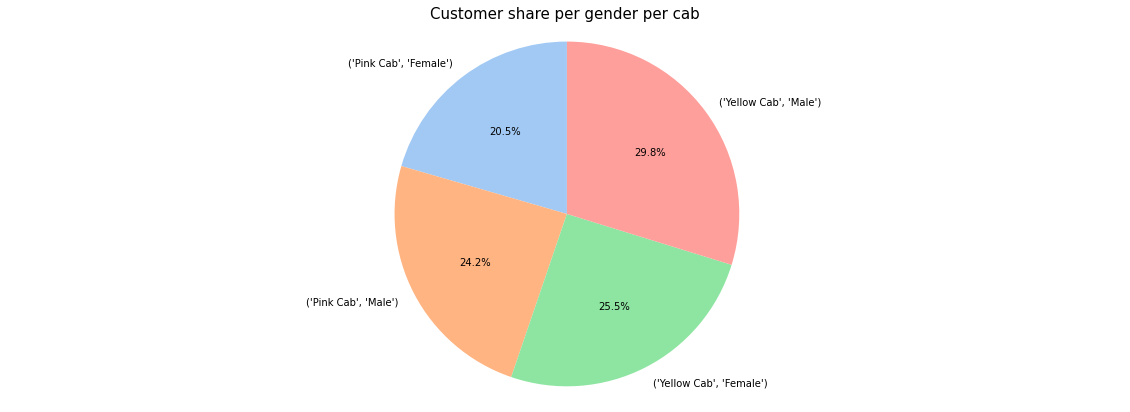

In [63]:
labs = cab_gender.index
vals = cab_gender.values

figp, axp = plt.subplots(figsize=(20,7))
colors = sns.color_palette('pastel')[0:5]

axp.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90, colors = colors)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

Observation:
* Yellow cab has more female customers than Pink cab.

#### g) Total margin per cab company per month


In [81]:
master['Margin'] = (master['Price_Charged'] - master['Cost_of_Trip'])
master.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Margin
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card,Male,28,10813,"814,885","24,701",57.3150
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,"814,885","24,701",281.2772
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,"814,885","24,701",194.6480
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card,Male,27,9237,"814,885","24,701",23.6660
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,"814,885","24,701",253.9808


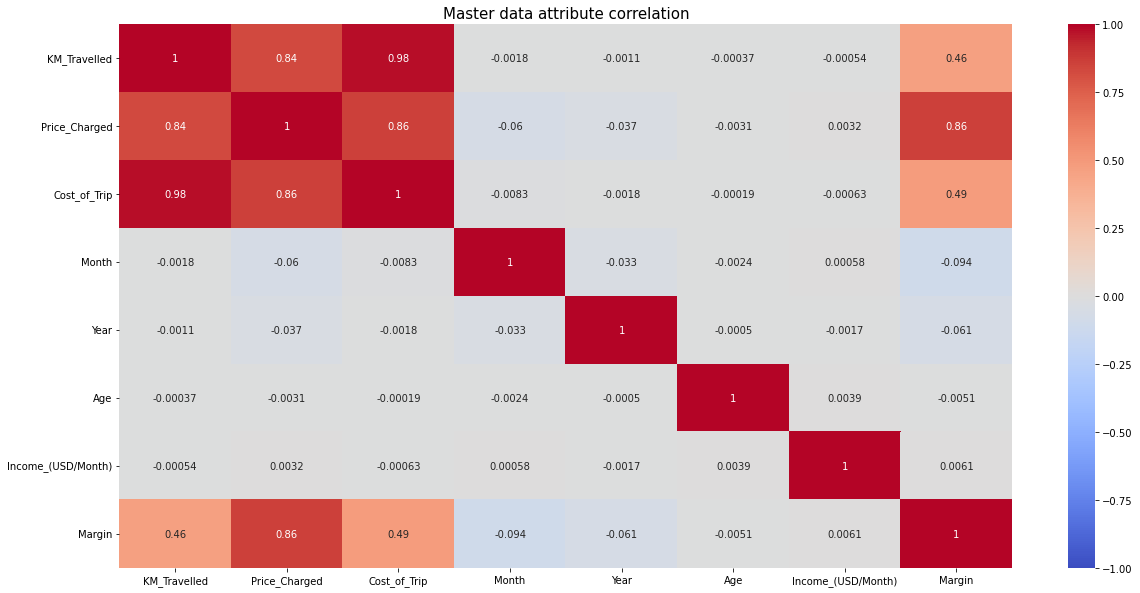

In [123]:
data = master[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Gender','Age','Income_(USD/Month)','Margin']]

plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')

plt.title('Master data attribute correlation', fontsize = 15)
plt.show()

There is a high correlation between:
* Margin and price charged (86%)
* Price charged and KM travelled (84%)
* Cost of trip and price charged (86%)
* Cost of trip and KM travelled (98%)

And low correlation between:
* Margin vs age, gender income, year, month which makes sense as margin doesn't depend on these factors. 

#### h) Total margin per cab company for the month of December
From our above analysis, we have observed that highest number of cab commute can be observed for the month of December for both cab companies. Therefore, doing analysis for the same.

In [92]:
city_dec_margin = master[master.Month==12].groupby('City').Margin.mean()
city_dec_margin

City
ATLANTA GA         96.252930
AUSTIN TX          91.891400
BOSTON MA          62.360750
CHICAGO IL         52.396687
DALLAS TX         109.465216
DENVER CO         111.138893
LOS ANGELES CA     81.752667
MIAMI FL          100.150911
NASHVILLE TN       81.459593
NEW YORK NY       258.421581
ORANGE COUNTY      76.134553
PHOENIX AZ         76.922806
PITTSBURGH PA      57.105846
SACRAMENTO CA      27.119039
SAN DIEGO CA       70.382592
SEATTLE WA         76.515311
SILICON VALLEY    167.087114
TUCSON AZ          84.105100
WASHINGTON DC      62.742899
Name: Margin, dtype: float64

In [108]:
#calculating for New York City
dt1 = master[(master.Company=='Pink Cab')&(master.City=='NEW YORK NY')].groupby(['Year','Month']).Margin.mean()
dt2 = master[(master.Company=='Yellow Cab')&(master.City=='NEW YORK NY')].groupby(['Year','Month']).Margin.mean()
dd1 = pd.DataFrame({'Margin_pink_cab':dt1.values,'Transactions_pink_cab':master[master.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margin_yellow_cab':dt2.values,'Transactions_yellow_cab':master[master.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

#calculating for Silicon valley
dt3 = master[(master.Company=='Pink Cab')&(master.City=='SILICON VALLEY')].groupby(['Year','Month']).Margin.mean()
dt4 = master[(master.Company=='Yellow Cab')&(master.City=='SILICON VALLEY')].groupby(['Year','Month']).Margin.mean()
dd3 = pd.DataFrame({'Margin_pink_cab':dt3.values,'Transactions_pink_cab':master[master.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd4 = pd.DataFrame({'Margin_yellow_cab':dt4.values,'Transactions_yellow_cab':master[master.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

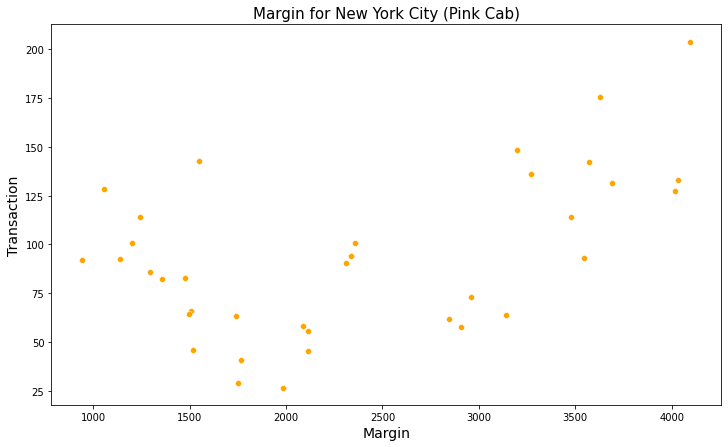

In [106]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=dd1.Transactions_pink_cab,y=dd1.Margin_pink_cab, color='orange')

plt.title('Margin for New York City (Pink Cab)', fontsize = 15)
plt.ylabel('Transaction',fontsize = 14)
plt.xlabel('Margin',fontsize = 14)

plt.show()

From the above graph, Pink cab margin increase with increase in number of transactions in New York City.





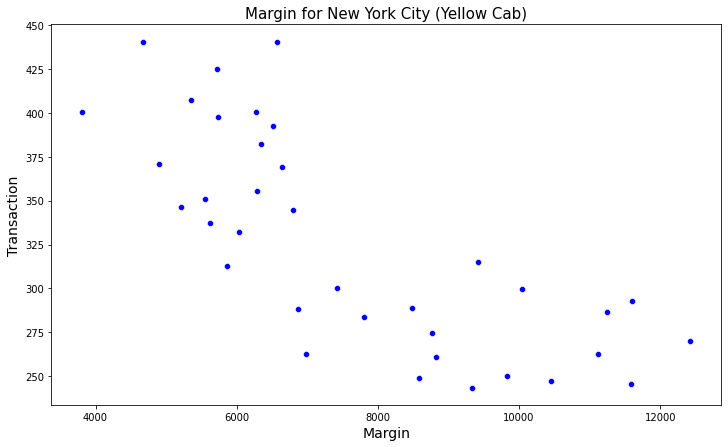

In [107]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=dd2.Transactions_yellow_cab,y=dd2.Margin_yellow_cab, color='blue')

plt.title('Margin for New York City (Yellow Cab)', fontsize = 15)
plt.ylabel('Transaction',fontsize = 14)
plt.xlabel('Margin',fontsize = 14)

plt.show()

From the above graph, Yellow cab margin decreases with increase in number of transactions in New York City.

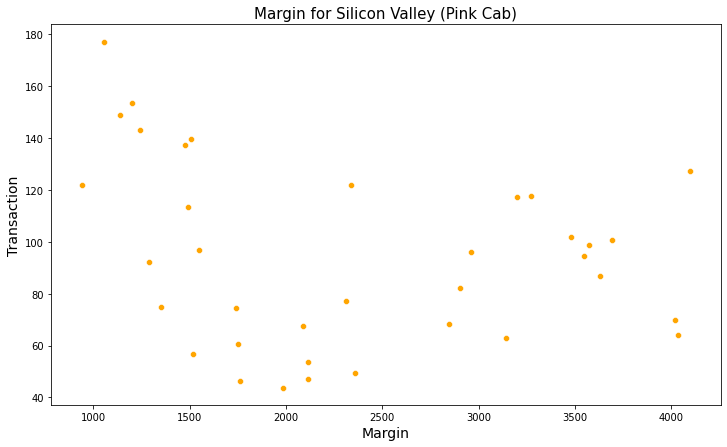

In [109]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=dd3.Transactions_pink_cab,y=dd3.Margin_pink_cab, color='orange')

plt.title('Margin for Silicon Valley (Pink Cab)', fontsize = 15)
plt.ylabel('Transaction',fontsize = 14)
plt.xlabel('Margin',fontsize = 14)

plt.show()

From the above graph, Pink cab margin decreases with increase in number of transactions in Silicon Valley.

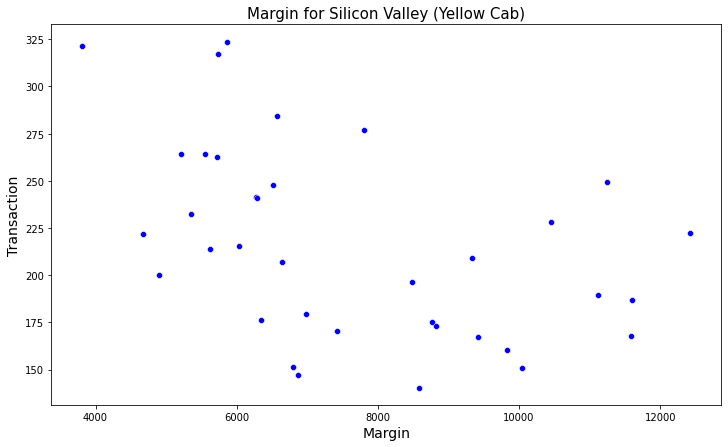

In [110]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=dd4.Transactions_yellow_cab,y=dd4.Margin_yellow_cab, color='blue')

plt.title('Margin for Silicon Valley (Yellow Cab)', fontsize = 15)
plt.ylabel('Transaction',fontsize = 14)
plt.xlabel('Margin',fontsize = 14)

plt.show()

From the above graph, Yellow cab margin decreases with increase in number of transactions in New York City.

#### i) Payment mode per gender

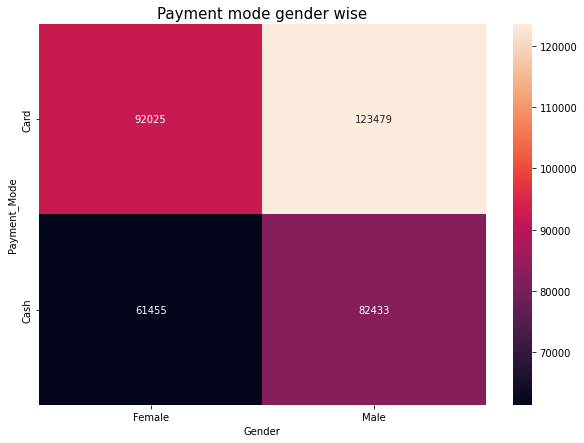

In [124]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pd.crosstab(index=master['Payment_Mode'], columns=master['Gender']),annot=True,fmt='d',ax=ax)

plt.title('Payment mode gender wise', fontsize = 15)
plt.show()

Observation:
* We can observe, a high amount of both males and females prefer to do payment by card.

## Hypothesis Testing

In [131]:
#Margin vs gender
yellow_female = master[(master.Gender=='Female')&(master.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
yellow_male = master[(master.Gender=='Male')&(master.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()

from scipy import stats
_, p_value_yellow = stats.ttest_ind(yellow_female.values,yellow_male.values,equal_var=True)
if(p_value_yellow<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value for Yellow cab ', p_value_yellow)

We accept alternate hypothesis that there is a statistical difference
P value for Yellow cab  6.060473042494144e-25


There is difference between Margin and Male-Female customers for yellow cabs.

In [130]:
#Margin vs gender
pink_female = master[(master.Gender=='Female')&(master.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
pink_male = master[(master.Gender=='Male')&(master.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()

from scipy import stats
_, p_value_pink = stats.ttest_ind(pink_female.values, pink_male.values,equal_var=True)
if(p_value_pink<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value for Pink cab ', p_value_pink)

We accept null hypothesis that there is no statistical difference
P value for Pink cab  0.11515305900425798


There is no difference between Margin and Male-Female customers for pink cabs. 

In [133]:
#Margin vs age
yellow_age_gr = master[(master.Age<=50)&(master.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()
yellow_age_ls = master[(master.Age>50)&(master.Company=='Yellow Cab')].groupby('Transaction_ID').Margin.mean()

from scipy import stats
_, p_value_yellow_age = stats.ttest_ind(yellow_age_gr.values, yellow_age_ls.values,equal_var=True)
if(p_value_yellow_age <0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value for yellow cab ', p_value_yellow_age)

We accept alternate hypothesis that theres a difference
P value for yellow cab  6.494256817799368e-09


In [134]:
#Margin vs age
pink_age_gr = master[(master.Age<=50)&(master.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()
pink_age_ls = master[(master.Age>50)&(master.Company=='Pink Cab')].groupby('Transaction_ID').Margin.mean()

from scipy import stats
_, p_value_pink_age = stats.ttest_ind(pink_age_gr.values, pink_age_ls.values,equal_var=True)
if(p_value_pink_age<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value for pink cab ', p_value_pink_age)

We accept null hypothesis
P value for pink cab  0.32817487547980695


Observation:
* Yellow cab provides discount for people for who are aolder than the age of 50. 

## Conclusion from EDA

* From EDA and various data visualisation such as travel frequnecy, yearly profit, cities travelled, margin ratio, the Yellow Cab company beats Pink Cab Company in every data analysis here. Thus, I recommend XYZ firm to invest in Yellow Cab Company.
* New York state is where the investment should be done high because of more users and more margin.
* The male:female ratio is good in both the cab companies therefore, both cabs are safe enough. 
* Yellow cab provides discount for senior citizens. 
